In [ ]:
import pandas as pd
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.6 MB/s eta 0:00:00


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.8 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('house_cleaned.csv')
df.shape

(964, 20)

In [ ]:
df.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,5 Bedroom House for sale in Sector 70A Gurgaon,house,bptp visionnaire,5.25,20115.0,2610.0,Plot area 290(242.48 sq.m.),5,4,3+,servant room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3.0,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,5 Bedroom House for sale in Sector 21A Faridabad,house,independent,5.70,105751.0,539.0,Plot area 539(50.07 sq.m.),5,4,2,"store room,pooja room,servant room","Sector 21A Faridabad, Gurgaon, Haryana",2.0,NaN,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN
2,10 Bedroom House for sale in Sushant Lok Phase 1,house,independent,2.10,38251.0,549.0,Plot area 61(51 sq.m.),10,10,3+,servant room,"Sushant Lok Phase 1, Gurgaon, Haryana",5.0,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,21 Bedroom House for sale in Sector 54 Gurgaon,house,independent,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,servant room,"Sector 54 Gurgaon, Gurgaon, Haryana",5.0,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
4,12 Bedroom House for sale in Sushant Lok Phase 1,house,independent,3.00,53763.0,558.0,Plot area 62(51.84 sq.m.),12,12,3+,others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5.0,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_name    964 non-null    object 
 1   property_type    964 non-null    object 
 2   society          964 non-null    object 
 3   price            945 non-null    float64
 4   price_per_sqft   945 non-null    float64
 5   area             945 non-null    float64
 6   areaWithType     964 non-null    object 
 7   bedRoom          964 non-null    int64  
 8   bathroom         964 non-null    int64  
 9   balcony          964 non-null    object 
 10  additionalRoom   964 non-null    object 
 11  address          959 non-null    object 
 12  floorNum         945 non-null    float64
 13  facing           661 non-null    object 
 14  agePossession    964 non-null    object 
 15  nearbyLocations  848 non-null    object 
 16  description      964 non-null    object 
 17  furnishDetails  

## Очистка данных

### Заполнение пропущенных значений

In [ ]:
df.isnull().mean()*100

,0
property_name,0.000000
property_type,0.000000
society,0.000000
price,1.970954
price_per_sqft,1.970954
area,1.970954
areaWithType,0.000000
bedRoom,0.000000
bathroom,0.000000
balcony,0.000000


In [ ]:
df[['price', 'price_per_sqft', 'area', 'floorNum']].isnull().corr()

,price,price_per_sqft,area,floorNum
price,1.000000,1.000000,1.000000,-0.020106
price_per_sqft,1.000000,1.000000,1.000000,-0.020106
area,1.000000,1.000000,1.000000,-0.020106
floorNum,-0.020106,-0.020106,-0.020106,1.000000


Значения в колонках price, price_per_sqft и area пропущенны в одних и тех же наблюдениях. Так как это исследоавние цены на дома в Индии, то колонка price - это целевая переменная и стоит удалить наблюдения с пропуском данной колонки

In [ ]:
df.dropna(subset=['price'], inplace=True)

#### floorNum

In [ ]:
df['floorNum'].value_counts()

,count
floorNum,
3.0,299
2.0,283
1.0,179
4.0,130
5.0,9
0.0,6
14.0,3
6.0,3
11.0,2


In [ ]:
df[df['floorNum'].isna()]

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
23,4 Bedroom House for sale in Sector 48 Gurgaon,house,vipul tatvam villa,8.50,26235.0,3240.0,Plot area 360(301.01 sq.m.),4,4,2,"pooja room,servant room,store room","Sector 48 Gurgaon, Gurgaon, Haryana",NaN,East,5 to 10 Year Old,"['Athena', 'Star Mall', 'The Sixth Element Sch...",Three side open villa in tatvam villa sector-4...,"['1 Chimney', '1 Modular Kitchen', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle4 out of 5..."
51,8 Bedroom House for sale in Palam Vihar,house,independent,5.60,17284.0,3240.0,Plot area 360(301.01 sq.m.),8,6,3+,"pooja room,study room,servant room,store room","Palam Vihar, Gurgaon, Haryana",NaN,South-West,5 to 10 Year Old,"['Palam Vihar Vyapar kendra', 'Palam triangle'...",360 sq. Yards plot area near by global foyer m...,"['1 Fan', '1 Dining Table', '1 Light', '1 Modu...",NaN,"['Environment5 out of 5', 'Lifestyle5 out of 5..."
128,3 Bedroom House for sale in DLF Phase 3,house,independent,1.45,26852.0,540.0,Plot area 60(50.17 sq.m.),3,3,1,not available,"DLF Phase 3, Gurgaon, Haryana",NaN,NaN,10+ Year Old,"['Dlf phase 3 metro station', 'Micromax moulsa...",Interested to sell independent house/villa.Pla...,NaN,['Private Garden / Terrace'],"['Environment4 out of 5', 'Lifestyle5 out of 5..."
177,3 Bedroom House for sale in Ashok Vihar,house,independent,1.50,10288.0,1458.0,Plot area 162(135.45 sq.m.)Built Up area: 210 ...,3,3,0,not available,"800 Lane 8 Ashok Vihar Part 1, Ashok Vihar, Gu...",NaN,NaN,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...",Ground floor and partial first floor built up,[],NaN,"['Environment4 out of 5', 'Lifestyle4 out of 5..."
195,2 Bedroom House for sale in Laxman Vihar Phase 2,house,independent,4.12,8889.0,4635.0,Plot area 515(430.61 sq.m.),2,1,3+,not available,"Laxman Vihar Phase 2, Gurgaon, Haryana",NaN,NaN,5 to 10 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Shre...","Property next to dhanwapur underpass, which is...",[],NaN,NaN
206,3 Bedroom House for sale in New Palam Vihar Ph...,house,independent,2.50,5472.0,4569.0,Plot area 4000(371.61 sq.m.),3,2,1,not available,"B-245, New Palam Vihar Phase 2, Gurgaon, Haryana",NaN,NaN,10+ Year Old,"['Palam Vihar Vyapar kendra', 'Palam triangle'...",100 mtr from dwarka express way. On 40ft road,NaN,['Park'],NaN
267,4 Bedroom House for sale in Laxman Vihar,house,independent,0.65,11111.0,585.0,Plot area 65(54.35 sq.m.),4,2,2,not available,"Laxman Vihar, Gurgaon, Haryana",NaN,NaN,5 to 10 Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...",Well maintained two storeyed independent house...,"['1 Wardrobe', '1 Exhaust Fan', '10 Light', '1...",NaN,"['Environment4 out of 5', 'Lifestyle4 out of 5..."
290,1 Bedroom House for sale in Sushant Lok Phase 1,house,ansal sushant lok plots,3.30,26570.0,1242.0,Plot area 138(115.39 sq.m.),1,1,0,not available,"Sushant Lok Phase 1, Gurgaon, Haryana",NaN,NaN,By 2027,"['Iffco chowk metro station', 'Huda city centr...","Close proximity to gold souk , huda city centr...",NaN,NaN,"['Environment5 out of 5', 'Lifestyle5 out of 5..."
309,2 Bedroom House for sale in Bhawani Enclave,house,independent,1.10,73333.0,150.0,Plot area 150(13.94 sq.m.),2,2,1,others,"Bhawani Enclave, Gurgaon, Haryana",NaN,NaN,10+ Year Old,"['State bank ATM', 'Shri Multispeciality Hospi...","2 side open, 1 drawing room, 1 shop, 1 small r...","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...",NaN,NaN
450,2 Bedroom House for sale in Jacobpura,house,jacob pura,0.35,9722.0,360.0,Built Up area: 360 (33.45 sq.m.),2,1,0,not available,"15/3, Jacobpura, Jacobpura, Gurgaon, Haryana",NaN,NaN,10+ Year Old,NaN,Independece house for sale in jacobpura near k...,[],NaN,"['Environment3 out of 5', 'Lifestyle4 out of 5..."


Данная колонка категориальная. Количество пропусков небольшое, поэтому можно заменить значением моды

In [ ]:
df['floorNum'] = df['floorNum'].fillna(df['floorNum'].mode()[0])

#### facing

Доля пропусков - 31.42%

In [ ]:
df['facing'].value_counts()

,count
facing,
East,176
North-East,156
North,107
West,72
North-West,43
South-East,37
South,33
South-West,24


Добавим уникальное значение "None" для пропущенных значений facing

In [ ]:
df['facing'] = df['facing'].fillna('None')

#### nearbyLocations

In [ ]:
df['nearbyLocations'].iloc[8]

'[\'Vodafone belvedere towers metro station\', \'Dlf phase 2 metro station\', \'Dlf phase 3 metro station\', \'Indusind bank cyber city metro station\', \'Sikandarpur metro station\', \'Shri Shiv Shakthi Mandir\', \'Jain Bhawan\', \'Arya Samaj Mandir\', \'Central bank atm teste 001112\', \'Central bank ATM\', \'Kotak mahindra ATM\', \'Citibank ATM\', \'Abn amro bank ATM\', \'Axis bank ATM\', \'Surgi Center Clinic\', \'Kailash Nursing Home Gurgaon\', \'RBS Dental Clinic\', \'Cosmodentz Dental Clinic\', \'Uma Sanjeevani Health Centre And Hospital\', \'Relief Physiotherapy Clinic\', \'Darpan Skin & Mind Clinic\', \'Durga Poly Clinic\', \'Krishna Family Clinic\', \'Guardian\', \'98.4\', \'Religare Wellness\', \'Shri Balaji Medical Store\', \'DLF Cyber City Phase II\', \'Emaar Business Park\', \'Standard chartered bank\', \'Icici bank\', \'Deutsche bank\', \'Hsbc bank\', \'Kotak mahindra bank\', \'Axis bank\', \'PVR Cinames\', \'Mukesh Dhaba\', \'Mc Donalds\', "McDonald\'s", \'Food Court\',

Заменим пустые значения на 0, впоследствии закодориуем данный атрибут, как длину массива

In [ ]:
df['nearbyLocations'] = df['nearbyLocations'].fillna(0)

#### furnishDetails

24% пропущенных значений

In [ ]:
df['furnishDetails'].iloc[234]

"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']"

Данный атрибут впоследствии может быть полезен, заменим также все пустые значения на 0, для дальнейшей обработки

In [ ]:
df['furnishDetails'] = df['furnishDetails'].fillna(0)

#### features
31% пропущенных значений

In [ ]:
df['features'].iloc[5]

"['Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal']"

Данная колонка тоже может потом пригодится, поэтому заменим на 0 пустые значения

In [ ]:
df['features'] = df['features'].fillna(0)

#### rating

In [ ]:
df['rating'].value_counts()

,count
rating,
"['Environment5 out of 5', 'Lifestyle5 out of 5', 'Connectivity5 out of 5', 'Safety5 out of 5']",123
"['Environment4 out of 5', 'Lifestyle4 out of 5', 'Connectivity4 out of 5', 'Safety4 out of 5']",112
"['Environment4 out of 5', 'Lifestyle4 out of 5', 'Connectivity5 out of 5', 'Safety4 out of 5']",108
"['Environment5 out of 5', 'Safety5 out of 5', 'Lifestyle5 out of 5', 'Connectivity5 out of 5']",53
"['Environment4 out of 5', 'Lifestyle5 out of 5', 'Connectivity5 out of 5', 'Safety4 out of 5']",46
...,...
"['Environment5 out of 5', 'Lifestyle5 out of 5', 'Connectivity4 out of 5', 'Safety5 out of 5']",1
"['Environment4 out of 5', 'Lifestyle4 out of 5', 'Connectivity3 out of 5', 'Safety3 out of 5']",1
"['Environment4.5 out of 5', 'Lifestyle4 out of 5', 'Connectivity5 out of 5', 'Safety5 out of 5']",1


Из данного атрибута потом можно получить рейтинг объекта, поэтому также заменим на 0 пустые значения

In [ ]:
df['rating'] = df['rating'].fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 945 entries, 0 to 963
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_name    945 non-null    object 
 1   property_type    945 non-null    object 
 2   society          945 non-null    object 
 3   price            945 non-null    float64
 4   price_per_sqft   945 non-null    float64
 5   area             945 non-null    float64
 6   areaWithType     945 non-null    object 
 7   bedRoom          945 non-null    int64  
 8   bathroom         945 non-null    int64  
 9   balcony          945 non-null    object 
 10  additionalRoom   945 non-null    object 
 11  address          940 non-null    object 
 12  floorNum         945 non-null    float64
 13  facing           945 non-null    object 
 14  agePossession    945 non-null    object 
 15  nearbyLocations  945 non-null    object 
 16  description      945 non-null    object 
 17  furnishDetails   945 

### Удаление ненужных столбцов
Столбец price_per_sqft удаляем, так как он содержит информацию о price и для прогнозирования не подойдет

In [ ]:
df = df.drop(['price_per_sqft', 'property_name', 'property_type', 'areaWithType', 'description', 'address'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 945 entries, 0 to 963
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   society          945 non-null    object 
 1   price            945 non-null    float64
 2   area             945 non-null    float64
 3   bedRoom          945 non-null    int64  
 4   bathroom         945 non-null    int64  
 5   balcony          945 non-null    object 
 6   additionalRoom   945 non-null    object 
 7   floorNum         945 non-null    float64
 8   facing           945 non-null    object 
 9   agePossession    945 non-null    object 
 10  nearbyLocations  945 non-null    object 
 11  furnishDetails   945 non-null    object 
 12  features         945 non-null    object 
 13  rating           945 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 110.7+ KB


## Анализ данных

### График распределения целевой переменной (цены)

<Figure size 800x600 with 0 Axes>

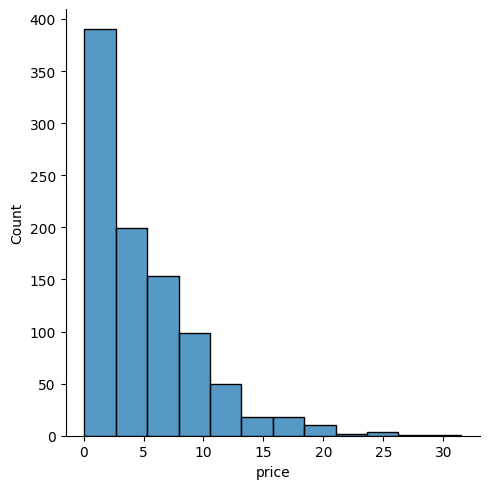

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.displot(x=df['price'], bins= 12)
plt.show()

### Анализ количественных признаков

In [ ]:
numeric_features = []
for column in df.columns:
    if str(df[column].dtype) != "object":
        numeric_features.append(column)
print("Количество признаков: " + str(len(numeric_features)))

Количество признаков: 5


In [ ]:
print(numeric_features)

['price', 'area', 'bedRoom', 'bathroom', 'floorNum']


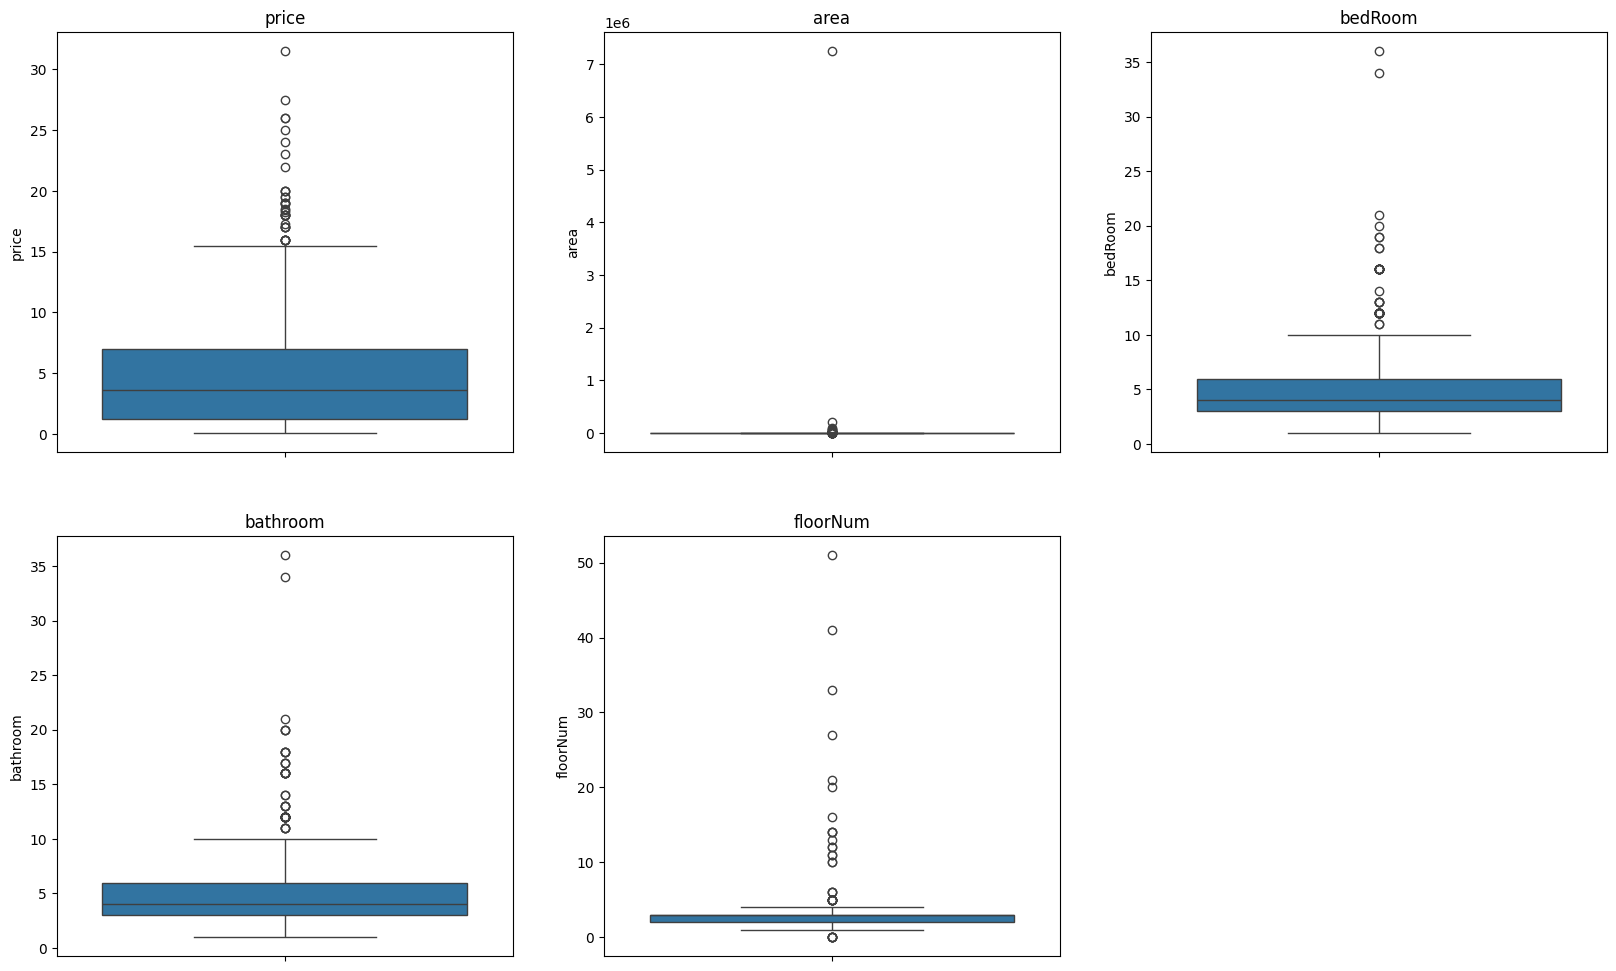

In [ ]:
fig, axarr = plt.subplots(figsize=(20,12))
plt.axis('off')
for idx, feature in enumerate(numeric_features):
    plt.subplot(2, 3, idx+1)
    sns.boxplot(data=df, y=feature)
    plt.title(feature)

### Работа с выбросами

In [ ]:
# функция для определения выбросов с помощью метода IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

#### bedRoom

In [ ]:
df['bedRoom'].value_counts()

,count
bedRoom,
4,230
5,183
3,146
2,87
6,80
9,44
1,38
8,33
7,30


In [ ]:
detect_outliers_iqr(df, 'bedRoom')

(-1.5, 10.5)

<Axes: xlabel='bedRoom', ylabel='price'>

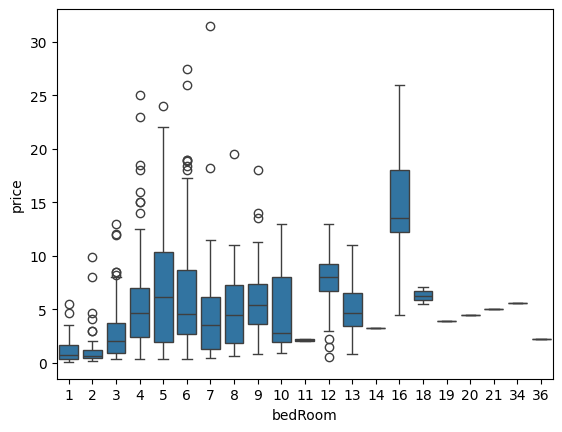

In [ ]:
sns.boxplot(data=df, y='price', x='bedRoom')

In [ ]:
df[['bedRoom', 'price']].corr()

,bedRoom,price
bedRoom,1.000000,0.280496
price,0.280496,1.000000


Верхняя граница равна 10.5. Сделаем максимальное количество комнат равное 10

In [ ]:
df.loc[df['bedRoom'] > 10, 'bedRoom'] = 10

In [ ]:
df[['bedRoom', 'price']].corr()

,bedRoom,price
bedRoom,1.000000,0.317704
price,0.317704,1.000000


Коэффициент корреляции вырос

#### bathRoom

In [ ]:
df['bathroom'].value_counts()

,count
bathroom,
4,225
3,164
5,132
2,112
6,82
1,64
9,41
7,37
8,26


In [ ]:
df[['bathroom', 'price']].corr()

,bathroom,price
bathroom,1.000000,0.418193
price,0.418193,1.000000


In [ ]:
detect_outliers_iqr(df, 'bathroom')

(-1.5, 10.5)

Верхняя граница равна 10.5. Сделаем максимальное количество ванных комнат равное 10

In [ ]:
df.loc[df['bathroom'] > 10, 'bathroom'] = 10

In [ ]:
df[['bathroom', 'price']].corr()

,bathroom,price
bathroom,1.000000,0.494059
price,0.494059,1.000000


#### area

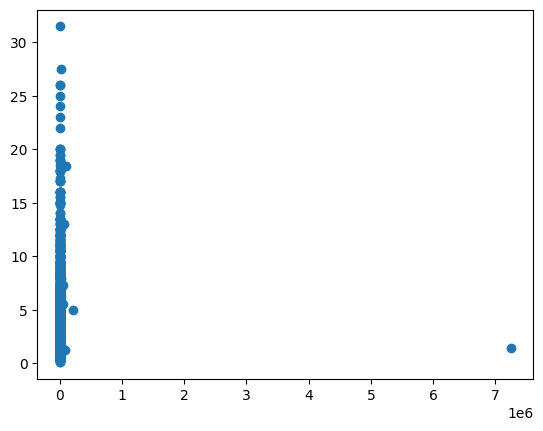

In [ ]:
plt.scatter(df['area'], df['price'])

Видим одно экстремальное значение, посмотрим на него

In [ ]:
df[df['area'] == df['area'].max()]

,society,price,area,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,rating
228,independent,1.45,7250000.0,4,3,3+,not available,3.0,South,5 to 10 Year Old,"['Shri Balaji Hospital and Trauma Center', 'Ka...",0,0,"['Environment4.5 out of 5', 'Lifestyle4.5 out ..."



Выглядит так, что ошиблись совсводом значения. Изменим данное значение на среднее для значения area для bedRoom = 4 и bathRoom = 3

In [ ]:
df.loc[df['area'] == df['area'].max(), 'area'] = df[(df['bedRoom'] == 4) & (df['bathroom'] == 3) & (df['area'] != df['area'].max())]['area'].mean()

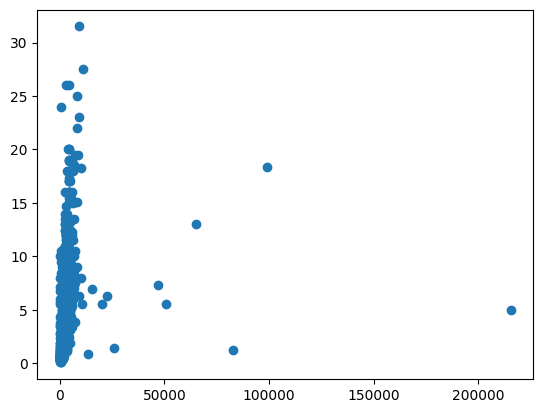

In [ ]:
plt.scatter(df['area'], df['price'])

In [ ]:
detect_outliers_iqr(df, 'area')

(-2363.5, 6472.5)

In [ ]:
df[['area', 'price']].corr()

,area,price
area,1.000000,0.172322
price,0.172322,1.000000


Будем совершать такую замену на среднее по bedroom и bathroom, пока максимальное area > 10000

In [ ]:
while df['area'].max() > 10000:
    max_row = df.loc[df['area'].idxmax()]

    bed_room_max = max_row['bedRoom']
    bath_room_max = max_row['bathroom']

    mean_area = df[(df['bedRoom'] == bed_room_max) &
                       (df['bathroom'] == bath_room_max) &
                       (df['area'] != max_row['area'])]['area'].mean()

    df.loc[df['area'] == max_row['area'], 'area'] = mean_area

In [ ]:
df[['area', 'price']].corr()

,area,price
area,1.000000,0.675855
price,0.675855,1.000000


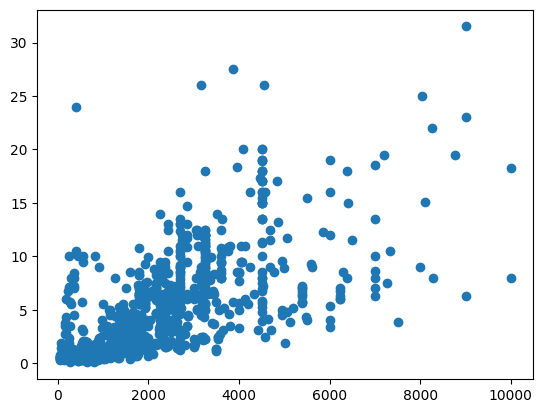

In [ ]:
plt.scatter(df['area'], df['price'])

Коэффициент корреляции значительно увеличился

#### floorNum

In [ ]:
df['floorNum'].value_counts()

,count
floorNum,
3.0,318
2.0,283
1.0,179
4.0,130
5.0,9
0.0,6
14.0,3
6.0,3
11.0,2


In [ ]:
df[['price', 'floorNum']].corr()

,price,floorNum
price,1.000000,0.059671
floorNum,0.059671,1.000000


In [ ]:
detect_outliers_iqr(df, 'floorNum')

(0.5, 4.5)

Видим большое количество разрозненных высоковысотных значений, ограничим их значением 5

In [ ]:
df.loc[df['floorNum'] > 4, 'floorNum'] = 5

In [ ]:
df[['price', 'floorNum']].corr()

,price,floorNum
price,1.000000,0.197085
floorNum,0.197085,1.000000


### Анализ категориальных признаков

In [ ]:
cat_features = []
for column in df.columns:
    if str(df[column].dtype) == "object":
        cat_features.append(column)
print("Количество признаков: " + str(len(cat_features)))

Количество признаков: 10


In [ ]:
print(cat_features)

['society', 'balcony', 'additionalRoom', 'facing', 'agePossession', 'nearbyLocations', 'furnishDetails', 'features', 'rating']


#### society

In [ ]:
df['society'].value_counts(1)

,proportion
society,
independent,0.594709
vipul tatvam villa,0.020106
international city by sobha phase 2,0.020106
international city by sobha phase 1,0.015873
emaar mgf marbella,0.013757
...,...
sai kripa floors 5,0.001058
naman residency,0.001058
dlf gardencity enclave,0.001058


Есть большой перекос в сторону значения indepenpent (59% значений). Остальные значения максимум 2%
Преобразуем значения данной колонки в independent и not independent

In [ ]:
df.loc[df['society'] != 'independent', 'society'] = 'not independent'

<Axes: xlabel='society', ylabel='price'>

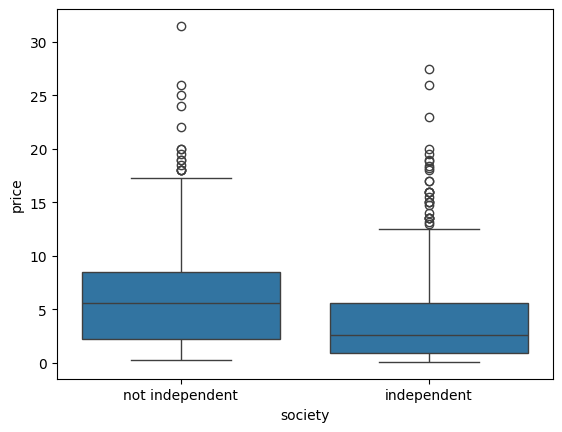

In [ ]:
sns.boxplot(data=df, y='price', x='society')

#### balcony

In [ ]:
df['balcony'].value_counts()

,count
balcony,
3+,352
2,217
3,158
0,114
1,104


<Axes: xlabel='balcony', ylabel='price'>

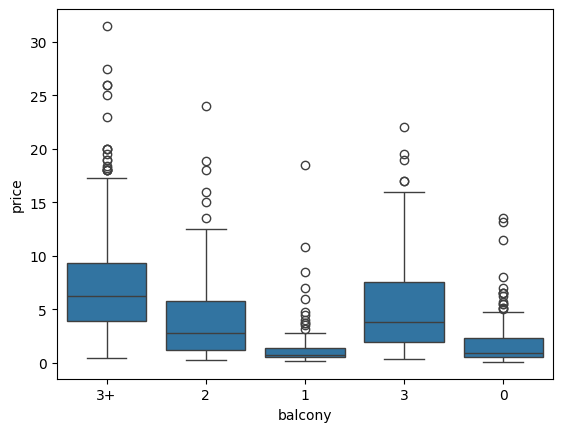

In [ ]:
sns.boxplot(data=df, y='price', x='balcony')

#### additionalRoom

In [ ]:
df['additionalRoom'].value_counts()

,count
additionalRoom,
not available,379
servant room,80
"pooja room,study room,servant room,store room",59
others,58
pooja room,38
"pooja room,study room,servant room",32
store room,31
"pooja room,study room,servant room,others",29
"pooja room,servant room",24


#### agePossession

In [ ]:
df['agePossession'].value_counts()

,count
agePossession,
5 to 10 Year Old,244
1 to 5 Year Old,220
10+ Year Old,214
undefined,141
0 to 1 Year Old,106
Within 6 months,7
Jun 2024,2
Dec 2023,2
Under Construction,2


Видим, что маленькое количество значений соответсвует значение "0 to 1 Year old"

In [ ]:
df.loc[df['agePossession'].isin(df['agePossession'].value_counts()[df['agePossession'].value_counts() < 10].index), 'agePossession'] = '0 to 1 Year Old'

<Axes: xlabel='agePossession', ylabel='price'>

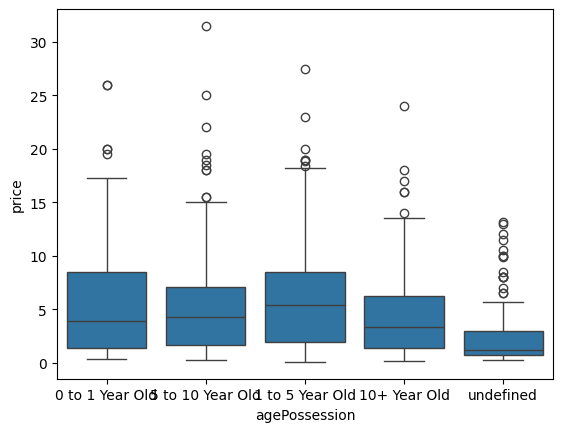

In [ ]:
sns.boxplot(data=df, y='price', x='agePossession')

## Моделирование

Модель - CatBoostRegressor

Метрики - MAE и R^2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 945 entries, 0 to 963
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   society          945 non-null    object 
 1   price            945 non-null    float64
 2   area             944 non-null    float64
 3   bedRoom          945 non-null    int64  
 4   bathroom         945 non-null    int64  
 5   balcony          945 non-null    object 
 6   additionalRoom   945 non-null    object 
 7   floorNum         945 non-null    float64
 8   facing           945 non-null    object 
 9   agePossession    945 non-null    object 
 10  nearbyLocations  945 non-null    object 
 11  furnishDetails   945 non-null    object 
 12  features         945 non-null    object 
 13  rating           945 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 143.0+ KB


In [ ]:
from sklearn.model_selection import train_test_split

df['floorNum'] = df['floorNum'].astype(str)
X = df[['society', 'area', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession', 'facing']]
y = df['price']

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Размеры тренировочной выборки: X_train - {X_train.shape}, y_train - {y_train.shape}")
print(f"Размеры тестовой выборки: X_test - {X_test.shape}, y_test - {y_test.shape}")
print(f"Размеры валидационной выборки: X_val - {X_val.shape}, y_val - {y_val.shape}")

Размеры тренировочной выборки: X_train - (756, 8), y_train - (756,)
Размеры тестовой выборки: X_test - (94, 8), y_test - (94,)
Размеры валидационной выборки: X_val - (95, 8), y_val - (95,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = X_train.copy()
X_valid_scaled = X_val.copy()
X_test_scaled = X_test.copy()

In [ ]:
X_train_scaled[['area', 'bedRoom', 'bathroom']] = scaler.fit_transform(X_train[['area', 'bedRoom', 'bathroom']])
X_valid_scaled[['area', 'bedRoom', 'bathroom']] = scaler.transform(X_val[['area', 'bedRoom', 'bathroom']])
X_test_scaled[['area', 'bedRoom', 'bathroom']] = scaler.transform(X_test[['area', 'bedRoom', 'bathroom']])

In [ ]:
cat_features = ['society', 'balcony', 'floorNum', 'agePossession', 'facing']

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import optuna

In [ ]:
RANDOM_SEED = 42
EARLY_STOPPING_ROUND = 50

In [ ]:
default_regressor = CatBoostRegressor(cat_features=cat_features, random_state=RANDOM_SEED, logging_level='Silent', task_type='GPU')
default_regressor.fit(X_train_scaled.copy(), y_train.copy())
pred_train = default_regressor.predict(X_train_scaled.copy())

In [ ]:
mean_absolute_error(y_train, pred_train)

1.2994846363422343

In [ ]:
optimized_regressor = CatBoostRegressor(
                                        cat_features=cat_features,
                                        depth=16,
                                        l2_leaf_reg=4.5,
                                        min_child_samples=64,
                                        grow_policy='Depthwise',
                                        iterations=10000,
                                        eval_metric='MAE',
                                        random_state=RANDOM_SEED,
                                        logging_level='Silent')
optimized_regressor.fit(X_train.copy(), y_train.copy(),
                        eval_set=[(X_val.copy(), y_val.copy())],
                        early_stopping_rounds=100)
pred_train = optimized_regressor.predict(X_train.copy())
pred_test = optimized_regressor.predict(X_test.copy())

In [ ]:
r2_score(y_train, pred_train)

0.8161862643070809

In [ ]:
r2_score(y_test, pred_test)

0.6696600396912622